### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [141]:
data = pd.read_csv('data/coupons.csv')

In [142]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [143]:
# Null or missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

# duplicates
duplicates = data.duplicated().sum()
print("Number of duplicate rows:", duplicates)


Missing Values:
 car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
dtype: int64
Number of duplicate rows: 74


In [144]:
print(data.describe())


        temperature  has_children  toCoupon_GEQ5min  toCoupon_GEQ15min  \
count  12684.000000  12684.000000           12684.0       12684.000000   
mean      63.301798      0.414144               1.0           0.561495   
std       19.154486      0.492593               0.0           0.496224   
min       30.000000      0.000000               1.0           0.000000   
25%       55.000000      0.000000               1.0           0.000000   
50%       80.000000      0.000000               1.0           1.000000   
75%       80.000000      1.000000               1.0           1.000000   
max       80.000000      1.000000               1.0           1.000000   

       toCoupon_GEQ25min  direction_same  direction_opp             Y  
count       12684.000000    12684.000000   12684.000000  12684.000000  
mean            0.119126        0.214759       0.785241      0.568433  
std             0.323950        0.410671       0.410671      0.495314  
min             0.000000        0.000000     

In [145]:
# unique values
for column in ['destination', 'passanger', 'weather', 'occupation', 'car', 'Bar', 'income']:
    unique_values = data[column].unique()
    print(f"\n{column}:\n", unique_values)


destination:
 ['No Urgent Place' 'Home' 'Work']

passanger:
 ['Alone' 'Friend(s)' 'Kid(s)' 'Partner']

weather:
 ['Sunny' 'Rainy' 'Snowy']

occupation:
 ['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical Social Science' 'Personal Care & Service'
 'Community & Social Services' 'Office & Administrative Support'
 'Construction & Extraction' 'Legal' 'Retired'
 'Installation Maintenance & Repair' 'Transportation & Material Moving'
 'Business & Financial' 'Protective Service'
 'Food Preparation & Serving Related' 'Production Occupations'
 'Building & Grounds Cleaning & Maintenance' 'Farming Fishing & Forestry']

car:
 [nan 'Scooter and motorcycle' 'crossover' 'Mazda5' 'do not drive'
 'Car that is too old to install Onstar :D']

Bar:
 ['never' 'less1' '1~3' 'gt8' nan '4~8']

income:
 [

3. Decide what to do about your missing data -- drop, replace, other...

In [146]:
# create a copy of the dataframe
clean_data = data.copy()
# drop car it has 12576 missing 
clean_data.drop(columns=['car'], inplace=True)
# drop toCoupon_GEQ5min
clean_data.drop(columns=['toCoupon_GEQ5min'], inplace=True)

In [147]:
print(clean_data.shape)
clean_data = clean_data.drop_duplicates()
print(clean_data.shape)

(12684, 24)
(12610, 24)


In [148]:
clean_data['age'] = np.where(clean_data['age'] == '50plus', '51', clean_data['age'])
clean_data['age'] = np.where(clean_data['age'] == 'below21', '20', clean_data['age'])
clean_data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,never,NaN,4~8,1~3,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,never,NaN,4~8,1~3,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,never,NaN,4~8,1~3,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,never,NaN,4~8,1~3,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,never,NaN,4~8,1~3,1,0,0,1,0


4. What proportion of the total observations chose to accept the coupon?



In [149]:
# proportion of the total coupons acceptance for original data and after data clean up
proportion_accepted = data['Y'].mean()
print(proportion_accepted)
clean_data_proportion_accepted = clean_data['Y'].mean()
print(clean_data_proportion_accepted)

0.5684326710816777
0.5675654242664552


5. Use a bar plot to visualize the `coupon` column.

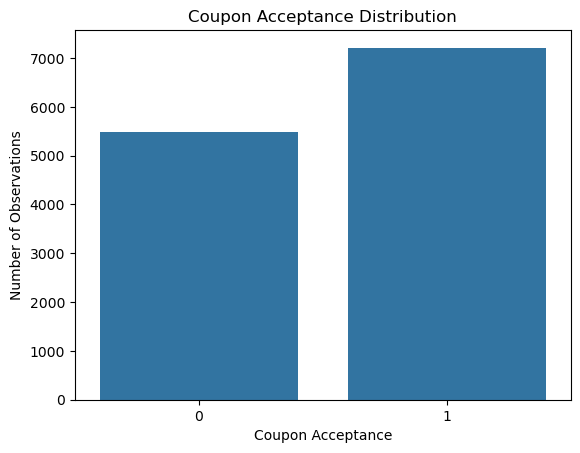

In [150]:
# Count the occurrences of '1' and '0' in the 'Y' column
coupon_counts = data['Y'].value_counts()

# Plot using Seaborn 
sns.barplot(x=coupon_counts.index, y=coupon_counts.values)

# Set labels and title
plt.xlabel('Coupon Acceptance')
plt.ylabel('Number of Observations')
plt.title('Coupon Acceptance Distribution')

# Display the plot
plt.show()

6. Use a histogram to visualize the temperature column.

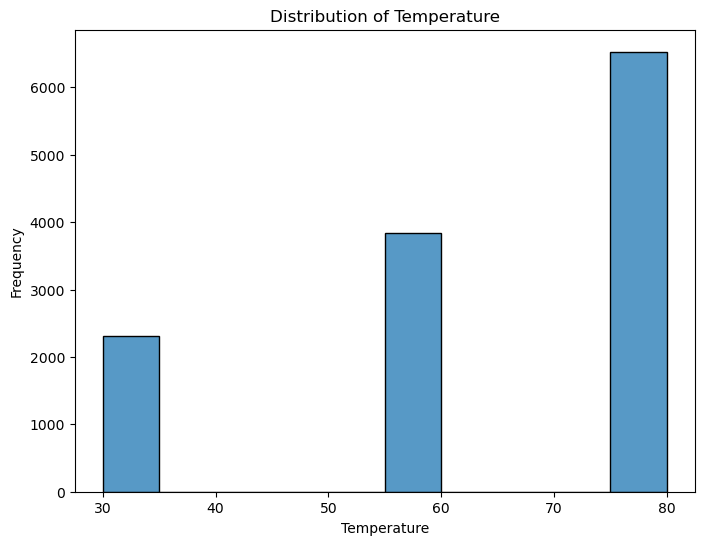

In [151]:
# Plot a histogram for the 'temperature' column
plt.figure(figsize=(8, 6))
sns.histplot(data['temperature'], bins=10, kde=False)

# Set labels and title
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Distribution of Temperature')

plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [152]:
# DataFrame for only 'Bar' coupons
data_bar = data[data['coupon'] == 'Bar']
data_bar.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [153]:
bar_proportion_accepted = data_bar['Y'].mean()
print(bar_proportion_accepted)

0.41001487357461575


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [154]:
bar_unique_values = data_bar['Bar'].unique()
print(bar_unique_values)

['never' 'less1' '1~3' 'gt8' nan '4~8']


In [155]:
data_bar.loc[data_bar['Bar'] == 'less1', 'Bar'] = '3 or fewer'
data_bar.loc[data_bar['Bar'] == '1~3', 'Bar'] = '3 or fewer'
data_bar.loc[data_bar['Bar'] == '4~8', 'Bar'] = 'More than 3'
data_bar.loc[data_bar['Bar'] == 'gt8', 'Bar'] = 'More than 3'
unique_values = data_bar['Bar'].unique()
print(unique_values)

['never' '3 or fewer' 'More than 3' nan]


In [156]:
# Calculate acceptance rates
acceptance_rate = data_bar.groupby('Bar')['Y'].mean() * 100
print(acceptance_rate)

Bar
3 or fewer     52.740434
More than 3    76.884422
never          18.795181
Name: Y, dtype: float64


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [157]:
# Define groups
pd.options.mode.copy_on_write = True
data_bar['age'] = np.where(data_bar['age'] == '50plus', '51', data_bar['age'])
data_bar['age'] = np.where(data_bar['age'] == 'below21', '20', data_bar['age'])
data_bar['age'] = pd.to_numeric(data_bar['age']).astype(int)
TwentyFivePlus = data_bar[(data_bar['Bar'] == 'More than 3') & (data_bar['age'] > 25)]
LessThanTwentyFive = data_bar[~((data_bar['Bar'] == 'More than 3') & (data_bar['age'] > 25))]

In [158]:
# Calculate acceptance rates
acceptance_rate_TwentyFivePlus = TwentyFivePlus['Y'].mean() * 100
acceptance_rate_LessThanTwentyFive = LessThanTwentyFive['Y'].mean() * 100
print("acceptance_rate_TwentyFivePlus :\n",acceptance_rate_TwentyFivePlus)
print("acceptance_rate_LessThanTwentyFive :\n",acceptance_rate_LessThanTwentyFive)

acceptance_rate_TwentyFivePlus :
 77.20588235294117
acceptance_rate_LessThanTwentyFive :
 38.38383838383838


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [159]:
# Filter for people who go to bars more than once a month
# 'Bar' column contains categories  'More than 3', '3 or fewer', 'never'
data_bar_filtered = data_bar[data_bar['Bar'].isin(['3 or fewer', 'More than 3'])]

#Exclude rows where passengers were a "kid"
#'passanger' column contains categories like 'Alone' 'Friend(s)' 'Kid(s)' 'Partner'
data_bar_filtered = data_bar_filtered[data_bar_filtered['passanger'] != 'Kid(s)']

#Exclude certain occupations (farming, fishing, forestry)
data_bar_filtered = data_bar_filtered[data_bar_filtered['occupation'] != 'Farming Fishing & Forestry']

#acceptance rate for data_bar filtered group
acceptance_rate = data_bar_filtered['Y'].mean()
print("drivers going to bar for 1 or 1+ times in a month with no kid passengers and no Farming, Fishing & Forestry occupation : ", acceptance_rate)


drivers going to bar for 1 or 1+ times in a month with no kid passengers and no Farming, Fishing & Forestry occupation :  0.5943396226415094


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [161]:
new_data_bar = clean_data[data['coupon'] == 'Bar']
new_data_bar.head()

/var/folders/4f/4s6hvwbd6zddjsfq20g95g8c0000gq/T/ipykernel_63281/1143883133.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_data_bar = clean_data[data['coupon'] == 'Bar']


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,never,NaN,4~8,1~3,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,never,NaN,4~8,1~3,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,never,NaN,4~8,1~3,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,never,less1,4~8,4~8,less1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,never,less1,4~8,4~8,less1,0,0,1,0,1


In [162]:
#1+ times in the bar, no kid passengers, and not widowed
no_widow_kid = new_data_bar[
    (new_data_bar['Bar'].isin(['1~3', '4~8', 'gt8'])) & 
    (new_data_bar['passanger'] != 'Kid(s)') & 
    (new_data_bar['maritalStatus'] != 'Widowed')
]

#convert age to int
new_data_bar['age'] = pd.to_numeric(new_data_bar['age']).astype(int)

# Under age 30 and 1+ times in the bar
not_age_30 = new_data_bar[
    (new_data_bar['Bar'].isin(['1~3', '4~8', 'gt8'])) & 
    (new_data_bar['age'] < 30)
]

# Vist cheap restaurants 4+ times and income < 50K
vist_cheap_restaurant = new_data_bar[
    (new_data_bar['RestaurantLessThan20'].isin(['4~8', 'gt8'])) & 
    (new_data_bar['income'].isin(['$37500 - $49999', '$12500 - $24999', '$25000 - $37499','Less than $12500']))
]

print("Acceptance rate of 1+ times, no kid passengers, and not widowed bar vistors : ", no_widow_kid['Y'].mean())
print("Acceptance rate of Under age 30 and 1+ times  bar vistors : ", not_age_30['Y'].mean())
print("Acceptance rate of cheap restaurants 4+ times vistors with income < 50K : ", vist_cheap_restaurant['Y'].mean())



Acceptance rate of 1+ times, no kid passengers, and not widowed bar vistors :  0.7132486388384754
Acceptance rate of Under age 30 and 1+ times  bar vistors :  0.7217391304347827
Acceptance rate of cheap restaurants 4+ times vistors with income < 50K :  0.45348837209302323


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [163]:
bar_analysis = clean_data[(clean_data['coupon'] == 'Bar') & (clean_data['Y'] == 1)]
#convert age to int
bar_analysis['age'] = pd.to_numeric(bar_analysis['age']).astype(int)

# Step 3: Create a DataFrame to summarize counts by age group
age_counts = bar_analysis['age'].value_counts().reset_index()
age_counts.columns = ['age', 'count']

bar_analysis.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,never,NaN,4~8,1~3,0,0,1,0,1
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,never,less1,4~8,4~8,less1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,never,less1,4~8,4~8,less1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,never,less1,4~8,4~8,less1,1,1,0,1,1
75,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Male,46,Married partner,...,less1,1~3,1~3,1~3,less1,1,0,0,1,1


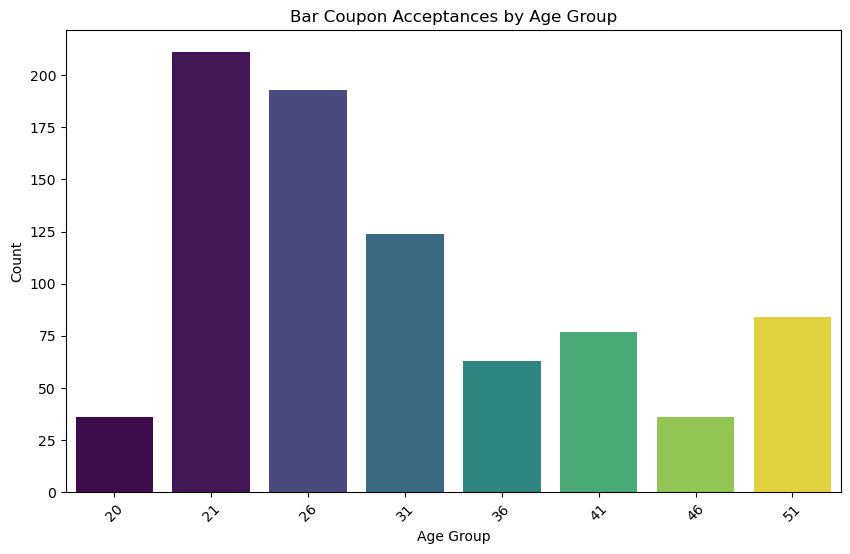

In [107]:
plt.figure(figsize=(10, 6))
sns.barplot(x='age', y='count', hue='age', data=age_counts, palette='viridis', legend=False)

plt.title('Bar Coupon Acceptances by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

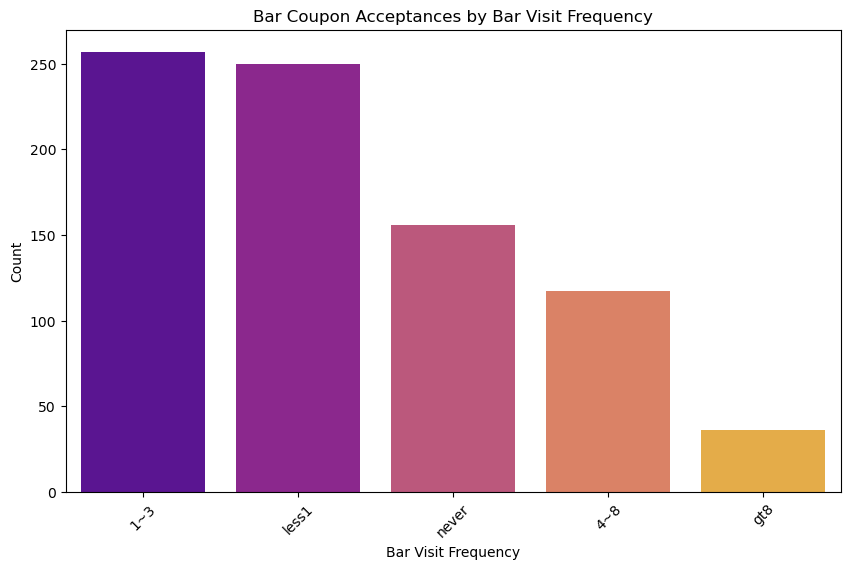

In [164]:
plt.figure(figsize=(10, 6))

# Create a count summary for bar visit frequency
bar_counts = bar_analysis['Bar'].value_counts().reset_index()
bar_counts.columns = ['Bar', 'count']

sns.barplot(x='Bar', y='count', hue='Bar', data=bar_counts, palette='plasma', legend=False)

plt.title('Bar Coupon Acceptances by Bar Visit Frequency')
plt.xlabel('Bar Visit Frequency')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

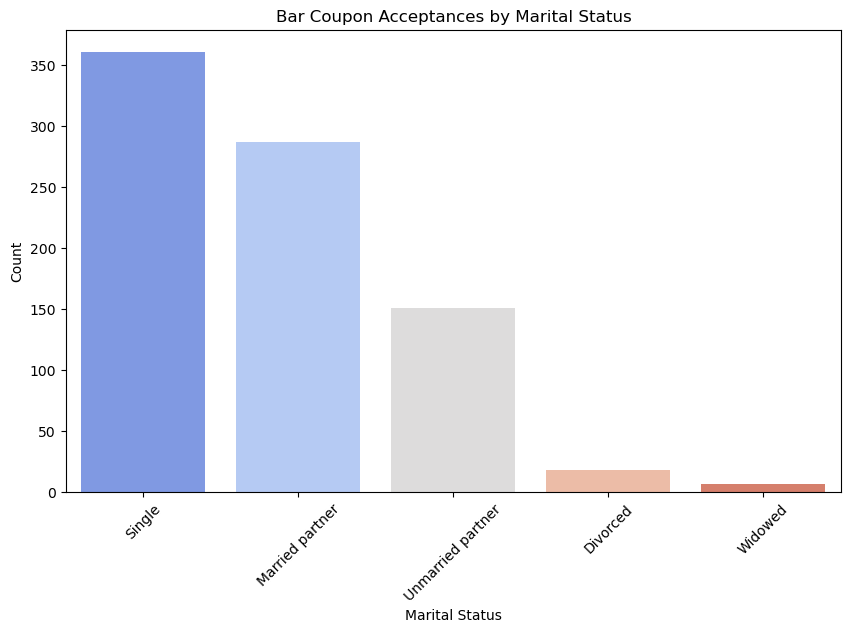

In [165]:
plt.figure(figsize=(10, 6))

# Create a count summary for marital status
marital_counts = bar_analysis['maritalStatus'].value_counts().reset_index()
marital_counts.columns = ['maritalStatus', 'count']

sns.barplot(x='maritalStatus', y='count', hue='maritalStatus', data=marital_counts, palette='coolwarm', legend=False)

plt.title('Bar Coupon Acceptances by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [166]:
#explore 'Carry out & Take away' coupon group
data_carryout = clean_data[(clean_data['coupon'] == 'Carry out & Take away') & (clean_data['Y'] == 1)]
#convert age to int
data_carryout['age'] = pd.to_numeric(data_carryout['age']).astype(int)
data_carryout.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,never,NaN,4~8,1~3,1,0,0,1,1
6,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,21,Unmarried partner,...,never,never,NaN,4~8,1~3,1,0,0,1,1
8,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,never,NaN,4~8,1~3,1,0,0,1,1
19,Work,Alone,Sunny,80,7AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,never,NaN,4~8,1~3,0,0,1,0,1
33,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Male,21,Single,...,never,less1,4~8,4~8,less1,1,0,0,1,1


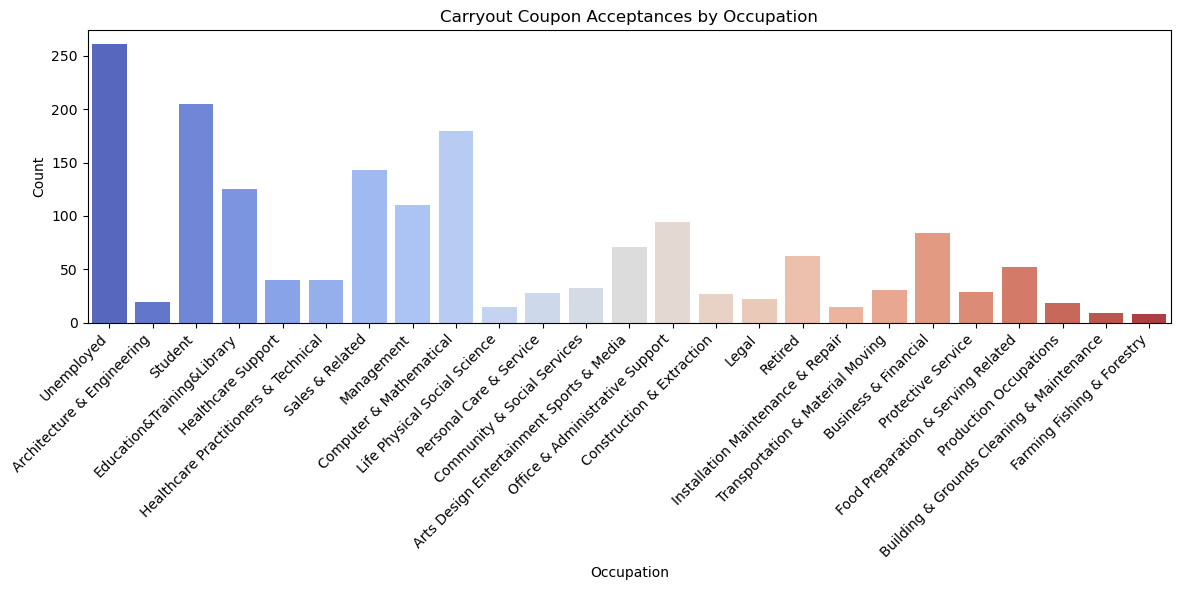

In [167]:
# Carryout Coupon Acceptance by Occupation
plt.figure(figsize=(12,6)) 
sns.countplot(x='occupation', data=data_carryout, hue='occupation', palette='coolwarm', dodge=False, legend=False)

# Adjust the label rotation and alignment to prevent overlapping
plt.title('Carryout Coupon Acceptances by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate labels and align to the right
plt.tight_layout()  # Adjust layout to prevent cut-off
plt.show()

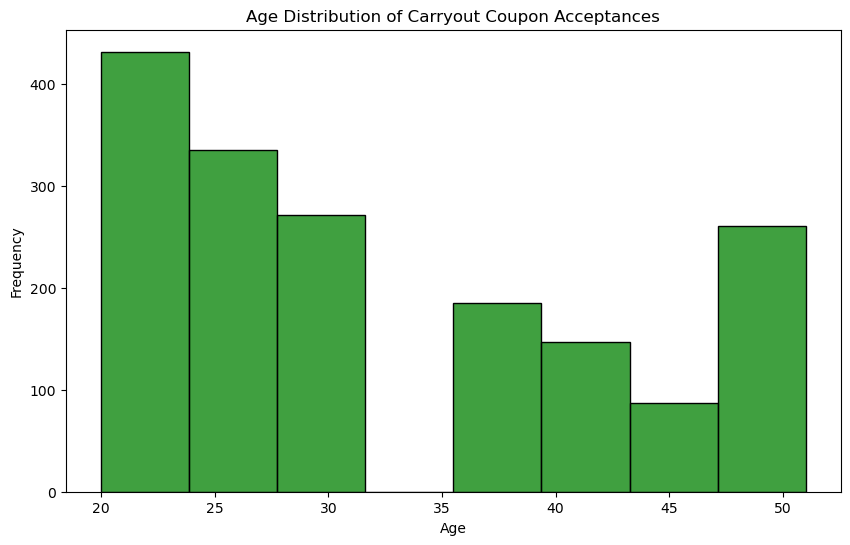

In [168]:
# Histogram of age distribution for accepted carryout coupons
plt.figure(figsize=(10,6))
sns.histplot(data_carryout['age'], bins=8, kde=False, color='green')
plt.title('Age Distribution of Carryout Coupon Acceptances')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

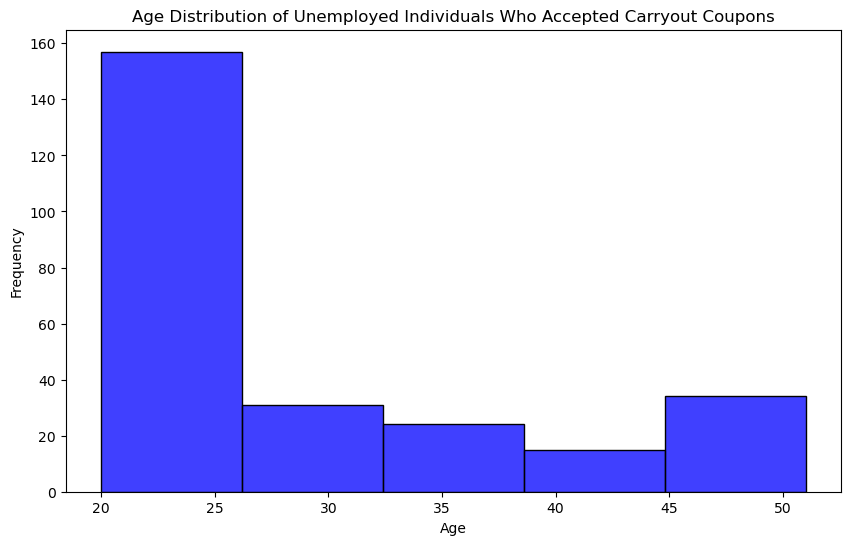

In [169]:
# Unemployed age group who depend on 'Carry out and Take away' coupons
data_unemployed_carryout = data_carryout[(data_carryout['occupation'] == 'Unemployed')]

#histogram showing the age distribution of unemployed individuals who accepted carryout coupons
plt.figure(figsize=(10,6))
sns.histplot(data_unemployed_carryout['age'], bins=5, kde=False, color='blue')

# Set labels and title
plt.title('Age Distribution of Unemployed Individuals Who Accepted Carryout Coupons')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()